In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

data = np.load('saxs/cache/small_joined_phases.npz')
data = data['Im3m']

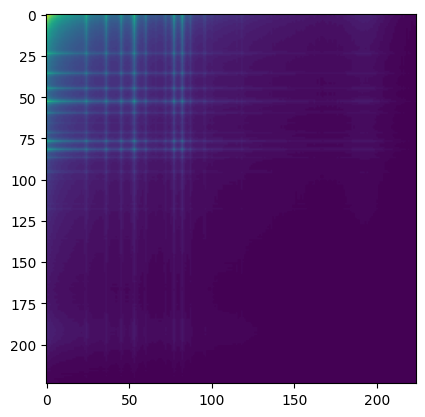

In [21]:
# data[0].shape
numpy_array = np.random.rand(256, 256, 3)
plt.imshow(np.uint8(data[0] * 255)[:, :, 2])

In [14]:
image = Image.fromarray(np.uint8(data[0] * 255))

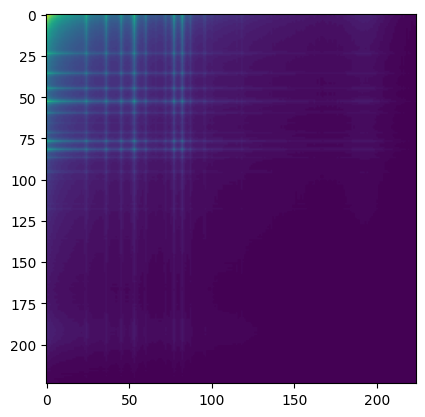

In [23]:
plt.imshow(np.uint8(data[0] * 255)[:, :, 1])

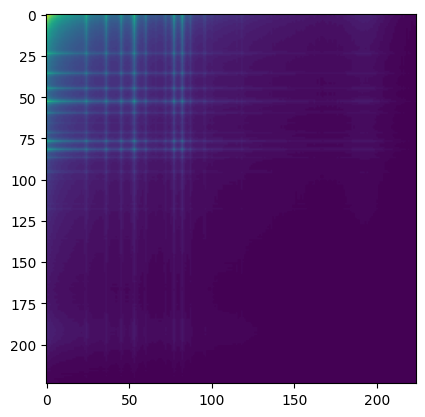

In [24]:
plt.imshow(np.uint8(data[0] * 255)[:, :, 0])

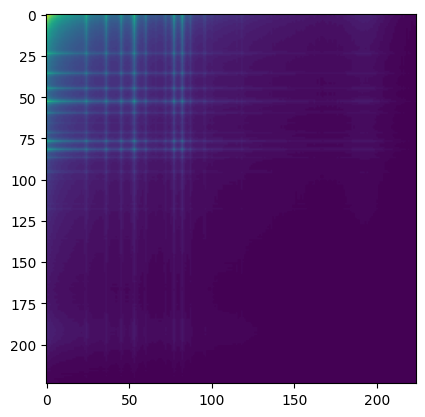

In [25]:
plt.imshow(np.uint32(data[0] * 255)[:, :, 0])

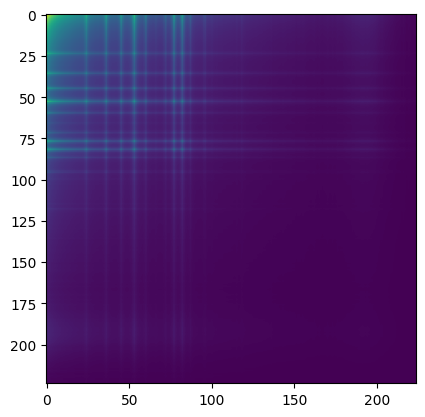

In [28]:
plt.imshow(data[0][:, :, 0]*255)

In [32]:
np.diag(np.uint8(data[0] * 255)[:, :, 0]) - np.diag((data[0] * 255)[:, :, 0])

array([-0.31951904, -0.1362114 , -0.28351593, -0.9183159 , -0.17019653,
       -0.71101   , -0.44808578, -0.7929764 , -0.80371857, -0.86912346,
       -0.16164207, -0.4373703 , -0.42540932, -0.3496704 , -0.32095528,
       -0.16025543, -0.03928947, -0.18940353, -0.26156998, -0.86302376,
       -0.30430794, -0.80934143, -0.42510605, -0.86670303, -0.85523987,
       -0.10861397, -0.56032753, -0.12169075, -0.39198303, -0.60320187,
       -0.09244728, -0.16410828, -0.5847721 , -0.48167515, -0.16318607,
       -0.48524475, -0.70052147, -0.31552505, -0.8652439 , -0.56956387,
       -0.38867378, -0.28588104, -0.0486784 , -0.6349602 , -0.56073093,
       -0.83514214, -0.13590908, -0.9634371 , -0.03516293, -0.9387512 ,
       -0.95212173, -0.686265  , -0.45166016, -0.13664246, -0.6151333 ,
       -0.8373966 , -0.8327379 , -0.845335  , -0.31049156, -0.67260265,
       -0.33959675, -0.47724342, -0.7033262 , -0.4151926 , -0.9900265 ,
       -0.00473166, -0.95720387, -0.9345765 , -0.4931264 , -0.51

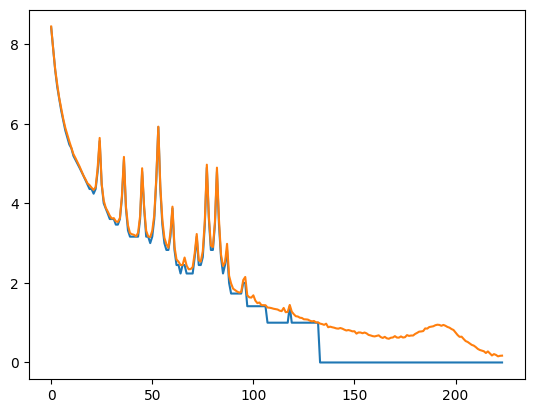

In [36]:
plt.plot(np.sqrt(np.diag(np.uint8(data[0] * 255)[:, :, 0])))
plt.plot(np.sqrt(np.diag((data[0] * 255)[:, :, 0])))

In [37]:
from saxs.model.model import SAXSViT

image = Image.fromarray(np.uint8(data[0] * 255))
a = SAXSViT()
b = a.data_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


torch.Size([3, 224, 224])

In [38]:
c = b(image)
c.shape

torch.Size([3, 224, 224])

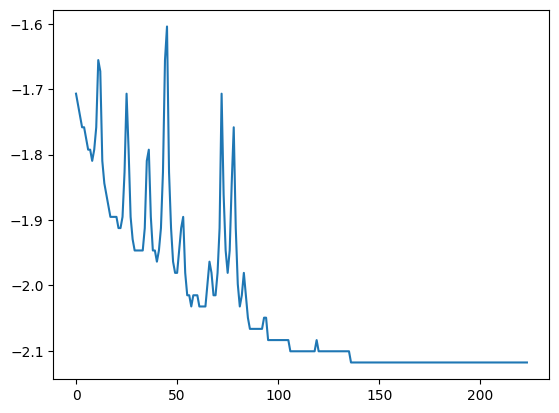

In [40]:
# plt.plot(np.sqrt(np.diag(np.uint8(data[0] * 255)[:, :, 0])))
# plt.plot(np.sqrt(np.diag((data[0] * 255)[:, :, 0])))
plt.plot(np.diag((c)[0, :, :]))


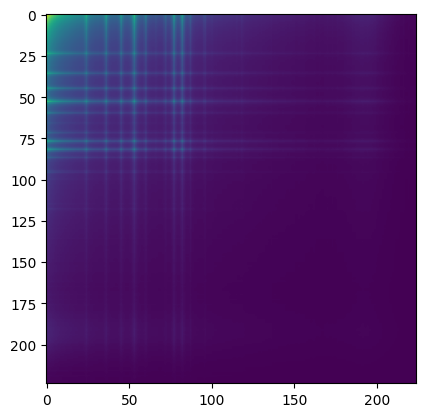

In [52]:
plt.imshow(np.uint8(data[0]/np.max(data[0]) * 255)[:, :, 0])

In [56]:
import torch

tensor = torch.tensor(0)

one_hot = torch.nn.functional.one_hot(tensor, num_classes=3)

print(one_hot)

tensor([1, 0, 0])


cubic
/Users/isaigordeev/Desktop/generated/Synthetic_Processed/la3d_cubic_processed_1500.npy


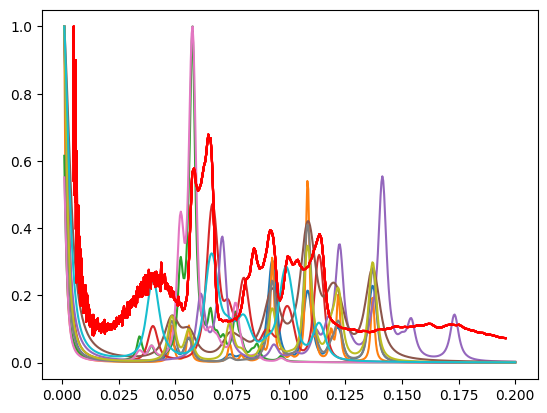

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

from saxs.data_generation.processing import Processing
from saxs.data_generation.data_visualization import load_data, plot_saxs, plot_saxs_featuremap
from saxs.data_generation.generation import Generator
from saxs.data_generation import DEFAULT_CONFIG_PATH

import json

from saxs.gaussian_processing.processing_outils import read_data

with open(DEFAULT_CONFIG_PATH) as config:
    config_data = json.load(config)


# q, d1, d3, exp_data = load_data(phase=config_data['phase'],
#                                 cubic_mesophase=config_data['cubic_mesophase'],)
                                # load_path='/Users/isaigordeev/Desktop/generated/Synthetic_Processed/')

q_, d1_, d3_, exp_data_ = load_data(phase=config_data['phase'],
                                cubic_mesophase=config_data['cubic_mesophase'],
                                load_path='/Users/isaigordeev/Desktop/generated/Synthetic_Processed/')


q_0, I_0, dI = read_data('/Users/isaigordeev/Desktop/2023/saxs/res/075775_treated_xye.csv')
# data = np.load('/Users/isaigordeev/Desktop/generated/{}_cubic_raw.npy'.format(config_data['cubic_mesophase']))
# data_good_q = np.load('/Users/isaigordeev/Desktop/2023/saxs/saxs/data_generation/Synthetic_raw/{}_cubic_raw.npy'.format(config_data['cubic_mesophase']))


# plot_saxs_featuremap(d3[0],q)
# plot_saxs_featuremap((d3[5]/np.max(d3[5])), q)
# for n in range(len(d1_)) :
#     plt.plot(q_, d1_[n]/np.max(d1_[n]))
#     plt.plot(q_0, I_0/np.max(I_0), 'red')


for n in random.sample(range(len(d1_)), 10):
    # plot_saxs(q , d1[n])
    plt.plot(q_, d1_[n]/np.max(d1_[n]))
    plt.plot(q_0, I_0/np.max(I_0), 'red')
plt.show()

In [21]:
data = np.load('saxs/data_generation/Synthetic_raw/la3d_cubic_raw.npy')
print(data[:40:4,0])

[[0.         0.03768446 0.04351426 0.05756396 0.07216024 0.06153846
  0.06880209 0.06343239 0.07536892 0.07844645 0.08426501 0.08702853
  0.09483714 0.09483714 0.09230769 0.10658774]
 [0.         0.03768446 0.04351426 0.05756396 0.07216024 0.06153846
  0.06880209 0.06343239 0.07536892 0.07844645 0.08426501 0.08702853
  0.09483714 0.09483714 0.09230769 0.10658774]
 [0.         0.03768446 0.04351426 0.05756396 0.07216024 0.06153846
  0.06880209 0.06343239 0.07536892 0.07844645 0.08426501 0.08702853
  0.09483714 0.09483714 0.09230769 0.10658774]]


In [64]:
data = np.load('/Users/isaigordeev/Desktop/generated/cache/la3d_cubic_raw.npy')
print(data.shape)
q, I, I2d, exp_data = load_data(phase=config_data['phase'],
                                cubic_mesophase=config_data['cubic_mesophase'],
                                load_path='/Users/isaigordeev/Desktop/generated/Synthetic_Processed/')

# print([q[0]==q[x] for x in range(0,10)])
# print(len(q))

(8000, 2, 9)
cubic
/Users/isaigordeev/Desktop/generated/Synthetic_Processed/la3d_cubic_processed.npy


In [57]:
data_proc = np.load('/Users/isaigordeev/Desktop/generated/Synthetic_Processed/la3d_cubic_processed.npy')
data_proc.shape

(20, 500, 500, 3)